# Classification of Images from the CIFAR-10 Dataset using  ANN (MLP) & CNN.
The CIFAR-10 dataset consists of color 60,000 images each with 32 x 32 pixel in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

Class labels are:

airplane : 0, automobile : 1, bird : 2, cat : 3, deer : 4, dog : 5, frog : 6, horse : 7, ship : 8, truck : 9.

### Import Tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for GPU

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
#physical_devices
print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


# Load Dataset

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## Show some sample images of data set with corresponding labels.


Example training images and their labels: [np.uint8(6), np.uint8(9), np.uint8(9), np.uint8(4), np.uint8(1), np.uint8(1), np.uint8(2), np.uint8(7), np.uint8(8), np.uint8(3)]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


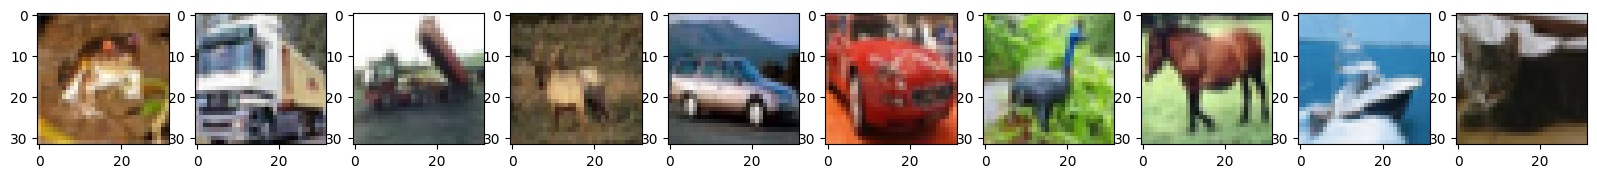

In [4]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]]))
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## Preparing the dataset
Normalize the input data

In [6]:
X_train = x_train / 255.0
X_test = x_test / 255.0
# Every Neuron is expected to have value from 0 to 1 to converge quickly(Gradient Descent)

# MLP Network

* I/p Layer - Flatten
* Hidden layer - 2048, AF = 'RELU'
* O/p Layer - 10 , AF-Softmax

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
ann = keras.Sequential()

ann.add(Flatten(input_shape=(32,32,3))) #input layer
ann.add(Dense(2048,activation='relu')) # Hidden layer
ann.add(Dense(10,activation='softmax')) # Output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = ann.fit(X_train ,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2836 - loss: 2.3099 - val_accuracy: 0.3852 - val_loss: 1.7088
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3886 - loss: 1.7084 - val_accuracy: 0.4044 - val_loss: 1.6660
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4220 - loss: 1.6197 - val_accuracy: 0.4261 - val_loss: 1.6255
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4400 - loss: 1.5712 - val_accuracy: 0.4329 - val_loss: 1.5851
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4516 - loss: 1.5416 - val_accuracy: 0.4437 - val_loss: 1.5621
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4614 - loss: 1.5140 - val_accuracy: 0.4490 - val_loss: 1.5453
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4740 - loss: 1.4906 - val_accuracy: 0.4588 - val_loss: 1.5166
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4756 - loss: 1.4765 - 

#### With the below simple function we will be able to plot our training history.

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## CNN Model

In [7]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [9]:
cnn = keras.Sequential()

cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))

cnn.add(MaxPooling2D((2,2)))

cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))

cnn.add(MaxPooling2D((2,2)))

cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))

cnn.add(MaxPooling2D((2,2)))

cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))

cnn.add(MaxPooling2D((2,2)))

cnn.add(Flatten())

cnn.add(Dense(64,activation='relu'))

cnn.add(Dropout(0.3))

cnn.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.2925 - loss: 1.8689 - val_accuracy: 0.5450 - val_loss: 1.2328
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5450 - loss: 1.2624 - val_accuracy: 0.6339 - val_loss: 1.0241
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6338 - loss: 1.0403 - val_accuracy: 0.6821 - val_loss: 0.9104
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6971 - loss: 0.8809 - val_accuracy: 0.7162 - val_loss: 0.8268
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7382 - loss: 0.7676 - val_accuracy: 0.7296 - val_loss: 0.8043
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7675 - loss: 0.6716 - val_accuracy: 0.7169 - val_loss: 0.8398
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7905 - loss: 0.5996 - val_accuracy: 0.7434 - val_loss: 0.7811
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8235 - loss: 0.5163 -

In [11]:
def plotLosses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

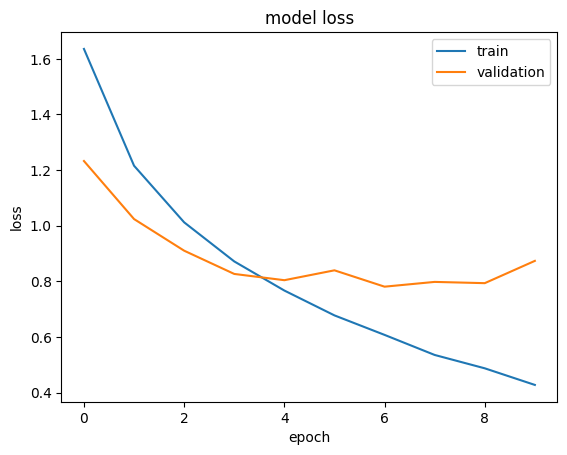

In [12]:
plotLosses(history)

In [13]:
def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

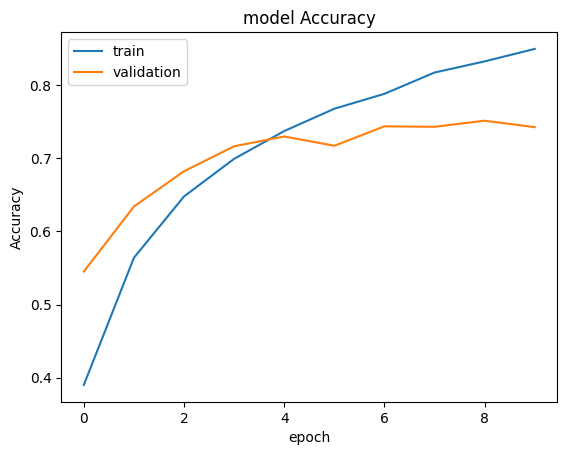

In [14]:
plotAccuracy(history)

In [15]:
score = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7416 - loss: 0.8769


In [16]:
print(cnn.metrics_names)
print(score)

['loss', 'compile_metrics']
[0.8738053441047668, 0.7422999739646912]


In [17]:
from keras.models import load_model

cnn.save('cnn_model.h5')

### CIFAR-10 class labels (fixed order)

In [18]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
model = tf.keras.models.load_model("cnn_model.h5")


#### Image preprocessing function (this is where most people screw up)

In [20]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0           # MUST match training
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

## Predict a single image

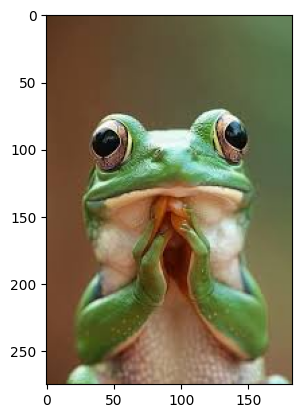

In [26]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img

# reading the image
testImage = img.imread('/content/frog.jpg')

# displaying the image
plt.imshow(testImage)

In [28]:
img_path = "/content/frog.jpg"

processed_img = preprocess_image(img_path)

predictions = model.predict(processed_img)
predicted_class = np.argmax(predictions)
confidence = np.max(predictions)

print("Predicted Class:", class_names[predicted_class])
print("Confidence:", confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class: airplane
Confidence: 0.95127


### Predict multiple images in a folder

In [ ]:
import os

image_dir = "test_images"

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)

    img = preprocess_image(img_path)
    preds = model.predict(img)

    label = class_names[np.argmax(preds)]
    conf = np.max(preds)

    print(f"{img_name} → {label} ({conf:.2f})")

<center><h1> Happy Learning